# FederatedPi
This is a project where we aim to apply a federated learning technique to a Multi-Layer Perceptron (MLP) model.

# Data Generation
    

In [230]:
#This file will generate data for training
#Temperature values range from 20C to 43C (highest recorded fever) in humans, 36.5 to 37.5 being the o.k. range
#Resting heart rate values range in humans range from 60 (low for an old person) and 190 (high for a newborn)

    #newborn : 140 ± 50
    #1–2 ans : 110 ± 40
    #3–5 ans : 105 ± 35
    #6–12 ans : 95 ± 30
    #adolescent ou adulte : 70 ± 10
    #personne âgée : 65 ± 5

#We will generate values based on the age of subjects and a gaussian normal distribution
#from faker import Faker
#from faker.providers import BaseProvider
import random
import csv
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

def get_age():
    #return  random.randrange(0, 100)
    return random.uniform(0,100)
def get_Temp():
    mu= 37
    sigma= 0.5

    return round(random.gauss(mu,sigma), 1)

def get_HR(age):

    if age<1:
        mu= 140
        sigma= 50
    elif age<3:
        mu= 110
        sigma= 40
    elif age<5:
        mu= 105
        sigma= 35
    elif age<12:
        mu= 95
        sigma= 30
    elif age<65:
        mu= 70
        sigma= 10
    else:
        mu= 65
        sigma= 5

    return round(random.gauss(mu,sigma), 1)

# def get_Label(age, temp, hr):
#     label=0
#     if ( 0<=age<1 and 90<=hr<=190 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 1<=age<3 and 70<=hr<=150 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 3<=age<6 and 70<=hr<=140 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 0<=age<12 and 65<=hr<=125 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 12<=age<65 and 60<=hr<=90 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( age>=65 and 60<=hr<=70 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     return label
def get_Label(age, temp, hr): # increases with age & hr & temp
#   label = round((hr/190)*(age/100)*90)
    if (age/100)>0.5 and (hr/190)<0.5 and temp>36.5 and temp<37.5:
        label=1
        return label
    label=0
    return label


def generate_DATA():
    a=get_age();
    b=get_Temp();
    c=get_HR(a);
    d=get_Label(a,b,c);
    return [a,b,c,d]
    #return [a,b,c,d]
    
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

with open('Data_Train.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Temperature', 'HeartBPM', 'Label'])
    for n in range(1, 100):
        writer.writerow(generate_DATA())

with open('Data_Test.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Temperature', 'HeartBPM', 'Label'])
    for n in range(1, 100):
        writer.writerow(generate_DATA())
        
#Data_Train = min_max_scaling(pd.read_csv('Data_Train.csv',dtype=np.float64))
#Data_Test = min_max_scaling(pd.read_csv('Data_Test.csv',dtype=np.float64))
Data_Train = pd.read_csv('Data_Train.csv')
Data_Test = pd.read_csv('Data_Test.csv')



##Data Visualisation

In [231]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Temperature'>

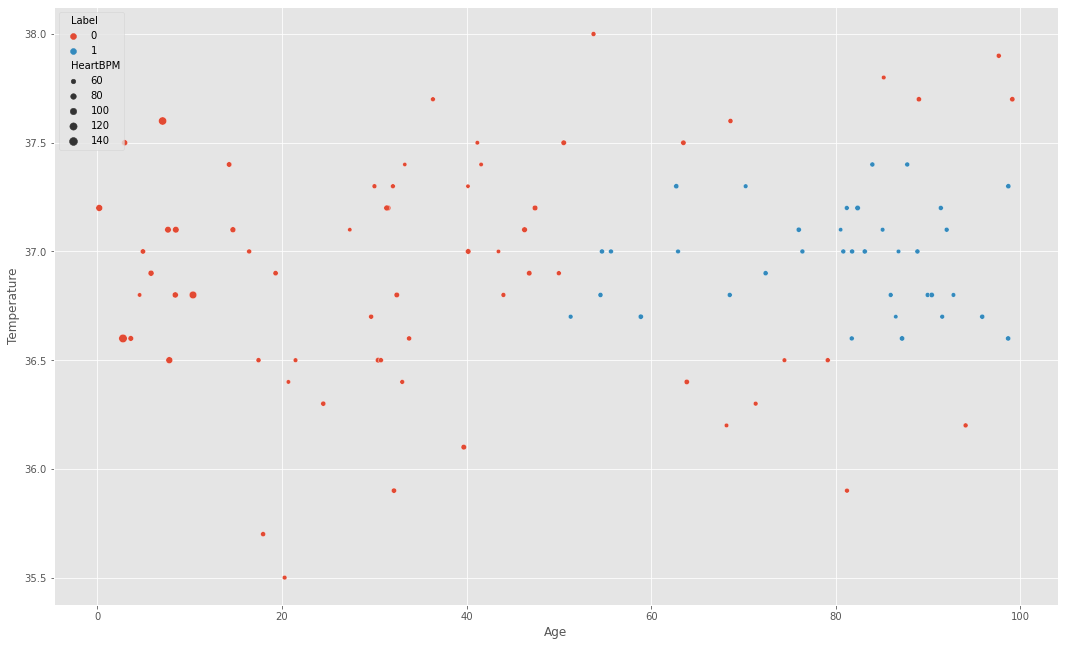

In [232]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,11)
sns.scatterplot(y = Data_Train.Temperature, x=Data_Train.Age,
               size = Data_Train.HeartBPM, hue= Data_Train.Label,
               )

<AxesSubplot:xlabel='Age', ylabel='HeartBPM'>

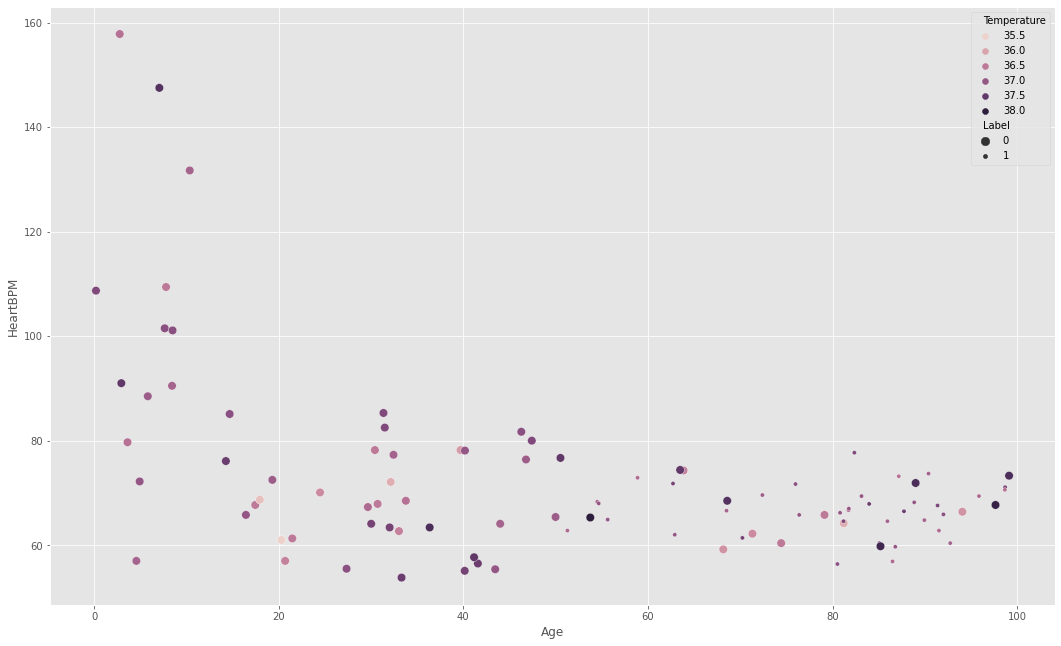

In [233]:
#Data_Train.plot(kind='scatter',x='Temperature',y='Age', color ='red', size = 'HeartBPM')
sns.scatterplot(x = Data_Train.Age, y=Data_Train.HeartBPM,
               size = Data_Train.Label, hue = Data_Train.Temperature)

In [234]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          99 non-null     float64
 1   Temperature  99 non-null     float64
 2   HeartBPM     99 non-null     float64
 3   Label        99 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


In [235]:
Data_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          99 non-null     float64
 1   Temperature  99 non-null     float64
 2   HeartBPM     99 non-null     float64
 3   Label        99 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


In [236]:
Data_Train.head(10)

,Age,Temperature,HeartBPM,Label
0,49.985217,36.9,65.4,0
1,16.437305,37.0,65.8,0
2,92.735185,36.8,60.4,1
3,71.309487,36.3,62.2,0
4,68.151162,36.2,59.2,0
5,3.614449,36.6,79.7,0
6,54.497110,36.8,68.3,1
7,63.846773,36.4,74.3,0
8,80.518529,37.1,56.4,1
9,30.011532,37.3,64.1,0


In [237]:
Data_Test.head(10)

,Age,Temperature,HeartBPM,Label
0,76.404114,37.4,71.1,1
1,56.217883,38.3,77.0,0
2,63.198114,37.0,67.8,1
3,98.649722,37.1,70.4,1
4,61.908173,36.9,67.5,1
5,80.675725,37.0,55.9,1
6,85.844685,38.1,68.2,0
7,4.258041,37.4,121.2,0
8,41.119996,36.1,61.9,0
9,68.670657,36.1,58.3,0


In [238]:
# train_dataset = np.loadtxt(open("Data.csv", "rb"), delimiter=",", skiprows=1)

In [239]:
Data_Train.describe()

,Age,Temperature,HeartBPM,Label
count,99.000000,99.000000,99.000000,99.000000
mean,52.465190,36.929293,72.122222,0.363636
std,30.531768,0.464066,17.014169,0.483494
min,0.194833,35.500000,53.800000,0.000000
25%,29.831784,36.650000,63.400000,0.000000
50%,51.266440,37.000000,67.900000,0.000000
75%,81.738780,37.200000,74.350000,1.000000
max,99.114414,38.000000,157.800000,1.000000


In [240]:
Data_Test.describe()

,Age,Temperature,HeartBPM,Label
count,99.000000,99.000000,99.000000,99.000000
mean,51.398298,37.021212,69.453535,0.313131
std,27.486928,0.511355,15.508472,0.466127
min,0.620483,35.300000,38.000000,0.000000
25%,31.309660,36.800000,61.400000,0.000000
50%,51.202171,37.000000,67.300000,0.000000
75%,74.747466,37.300000,73.500000,1.000000
max,99.390568,38.400000,146.300000,1.000000


In [241]:
sum(Data_Test.duplicated())
sum(Data_Train.duplicated())

0

## This dataset contains no : missing data, qualitative values, normalized values


# Data Pre-Processing

In [242]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0

# percentage of training set to use as validation
valid_size = 0.2


In [243]:

# obtain training indices that will be used for validation
num_train = len(Data_Train)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]


In [244]:
Data_Train

,Age,Temperature,HeartBPM,Label
0,49.985217,36.9,65.4,0
1,16.437305,37.0,65.8,0
2,92.735185,36.8,60.4,1
3,71.309487,36.3,62.2,0
4,68.151162,36.2,59.2,0
...,...,...,...,...
94,4.930634,37.0,72.2,0
95,62.707700,37.3,71.8,1
96,17.947390,35.7,68.7,0
97,95.854222,36.7,69.4,1


In [245]:
# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

targets_df = pd.DataFrame(data=Data_Train["Label"])
targets_df.columns = ["Label"]


del Data_Train["Label"]

train = torch.utils.data.TensorDataset(torch.Tensor(np.array(Data_Train)), torch.tensor(targets_df['Label'].values))

train_loader = torch.utils.data.DataLoader(train,sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train,sampler=valid_sampler, num_workers=num_workers)

test_targets_df = pd.DataFrame(data=Data_Test["Label"])
test_targets_df.columns = ["Label"]

del Data_Test["Label"]

test = torch.utils.data.TensorDataset(torch.Tensor(np.array(Data_Test)), torch.tensor(test_targets_df['Label'].values))

test_loader = torch.utils.data.DataLoader(test,num_workers=num_workers)

In [246]:
train_loader

In [247]:
test_loader

# Building Model

In [248]:
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch import nn
class Network(nn.Module):

    def __init__(self):
        super().__init__()

        # Inputs to hidden layer linear transformation
        #self.drop1 = nn.Dropout(p=0.8)
        self.input = nn.Linear(3, 5)
        #self.drop2 = nn.Dropout(p=0.5)
        self.hidden1 = nn.Linear(5, 5)
        self.hidden2 = nn.Linear(5, 4)
#         self.hidden3 = nn.Linear(5, 5)
#         self.hidden4 = nn.Linear(5, 5)
        self.hidden5 = nn.Linear(4, 2)
        
        self.output = nn.Linear(2, 2)
        # Define sigmoid activation and softmax output
        self.ReLU = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass the input tensor through each of our operations
        #x = self.drop1(x)
        x = self.input(x)
        #x = self.drop2(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
#         x = self.hidden3(x)
#         x = self.hidden4(x)
        x = self.hidden5(x)

        x = self.ReLU(x)
        x = self.output(x)
        
        #x = self.softmax(x)

        return x

model = Network()


In [249]:
model

Network(
  (input): Linear(in_features=3, out_features=5, bias=True)
  (hidden1): Linear(in_features=5, out_features=5, bias=True)
  (hidden2): Linear(in_features=5, out_features=4, bias=True)
  (hidden5): Linear(in_features=4, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=2, bias=True)
  (ReLU): ReLU()
  (softmax): Softmax(dim=1)
)

# Training Model

Loss function is categorical cross-entropy
Optimisation is done by ADAM

In [250]:
# specify loss function (categorical cross-entropy for classification, L1 loss for mean absolute error)

criterion = nn.CrossEntropyLoss()
#criterion = nn.L1Loss
#criterion = nn.NLLLoss()
#c


# specify optimizer (stochastic gradient descent)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# optimizer = torch.optim.NAdam(model.parameters(), lr=0.2, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, momentum_decay=0.004)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True)

In [251]:
import matplotlib.pyplot as plt

val_losses = []
train_losses = []

## https://www.kaggle.com/shubhendumishra/titanic-mlp-model-using-pytorch#Data-Exploration

In [252]:
print(output[0])

tensor([ 0.2964, -0.4517], grad_fn=<SelectBackward>)


In [253]:
print(target[0])

tensor(0)


In [254]:
# number of epochs to train the model
n_epochs = 100

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # Train the model #
    ###################
    model.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        output = model(data[:,0:3])#.type(torch.FloatTensor)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    #################
    # Training Loss #
    #################
    #train_losses.append(loss.item())
    train_losses.append(train_loss/len(train_loader.sampler))
        
    ######################    
    # Validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data[:,0:3])
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
    #############
    #Tensorboard#
    #############
        #val_losses.append(loss.item())
    val_losses.append(valid_loss/len(valid_loader.sampler))
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.502488 	Validation Loss: 0.488028
Validation loss decreased (inf --> 0.488028).  Saving model ...
Epoch: 2 	Training Loss: 0.425434 	Validation Loss: 0.441559
Validation loss decreased (0.488028 --> 0.441559).  Saving model ...
Epoch: 3 	Training Loss: 0.398269 	Validation Loss: 0.347953
Validation loss decreased (0.441559 --> 0.347953).  Saving model ...
Epoch: 4 	Training Loss: 0.444607 	Validation Loss: 0.339357
Validation loss decreased (0.347953 --> 0.339357).  Saving model ...
Epoch: 5 	Training Loss: 0.411561 	Validation Loss: 0.337814
Validation loss decreased (0.339357 --> 0.337814).  Saving model ...
Epoch: 6 	Training Loss: 0.372613 	Validation Loss: 0.316365
Validation loss decreased (0.337814 --> 0.316365).  Saving model ...
Epoch: 7 	Training Loss: 0.344944 	Validation Loss: 0.347577
Epoch: 8 	Training Loss: 0.371936 	Validation Loss: 0.317755
Epoch: 9 	Training Loss: 0.360147 	Validation Loss: 0.306648
Validation loss decreased (0.316365 --> 0.

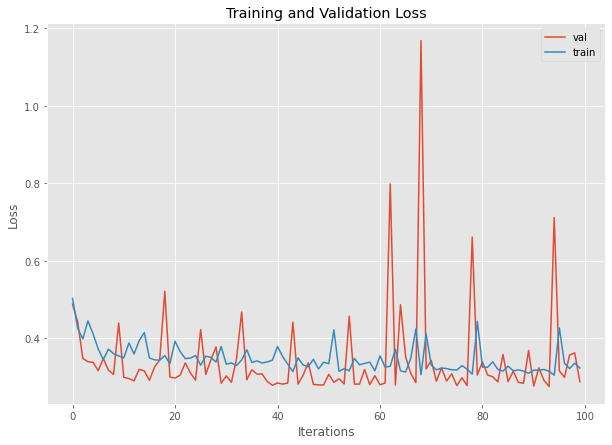

In [259]:
plt.figure(figsize=(10,7))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [256]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [257]:
Data_Test.head()

,Age,Temperature,HeartBPM
0,76.404114,37.4,71.1
1,56.217883,38.3,77.0
2,63.198114,37.0,67.8
3,98.649722,37.1,70.4
4,61.908173,36.9,67.5


In [258]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation
results=[]
for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data[:,:3])
    print(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    results.append([int(data[:,0].item()), pred.item()])
    # compare predictions to true label
    correct = pred.eq(target.view_as(pred))
  
    # calculate test accuracy for each object class
    #break
    #print('Output %s Target %s Predicted %s Correct %s' % (output,target.item(),pred.item(),correct.item()))
    for i in range(len(target)):
        label = target.data
        class_correct[label] += correct.item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

tensor([[76.4041, 37.4000, 71.1000]])
tensor([[56.2179, 38.3000, 77.0000]])
tensor([[63.1981, 37.0000, 67.8000]])
tensor([[98.6497, 37.1000, 70.4000]])
tensor([[61.9082, 36.9000, 67.5000]])
tensor([[80.6757, 37.0000, 55.9000]])
tensor([[85.8447, 38.1000, 68.2000]])
tensor([[  4.2580,  37.4000, 121.2000]])
tensor([[41.1200, 36.1000, 61.9000]])
tensor([[68.6707, 36.1000, 58.3000]])
tensor([[13.8899, 36.8000, 56.6000]])
tensor([[21.9548, 35.8000, 74.0000]])
tensor([[74.6131, 37.1000, 65.1000]])
tensor([[66.0839, 36.8000, 74.1000]])
tensor([[64.8803, 37.8000, 51.4000]])
tensor([[83.8017, 36.5000, 65.1000]])
tensor([[59.4501, 36.9000, 63.8000]])
tensor([[89.6317, 37.5000, 61.0000]])
tensor([[69.1493, 37.1000, 66.0000]])
tensor([[78.1714, 36.3000, 66.7000]])
tensor([[39.2115, 37.1000, 51.6000]])
tensor([[16.2294, 36.9000, 90.9000]])
tensor([[52.2047, 37.0000, 53.7000]])
tensor([[43.3754, 37.7000, 66.9000]])
tensor([[30.9277, 36.9000, 74.3000]])
tensor([[ 2.9219, 37.4000, 38.0000]])
tensor([[